<a href="https://colab.research.google.com/github/Daim-Nickel-Penny/Fly-Deals-Backend/blob/main/Fly_Deals_Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bringing the data from kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d promptcloud/easemytrip-flight-fare-details-2020

  0% 0.00/1.68M [00:00<?, ?B/s]
100% 1.68M/1.68M [00:00<00:00, 56.0MB/s]


In [ ]:
!unzip -qq -o /content/easemytrip-flight-fare-details-2020.zip

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
flight_data=pd.read_csv("Flight-Data.csv")

In [ ]:
flight_data.head()

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0
3,26135ec458c4204ddf036eae4119dd90,2020-02-01 00:33:23 +0000,Nagpur,Mumbai,Goa,NaN,Pune,Air India|Air India|Air India,AI-630|AI-33|AI-9562,03Feb2020,21:10,04Feb2020,14:45,17h 35m,2,12528.0
4,c29198e6745d72220af30969f05a7841,2020-01-01 00:18:01 +0000,Mumbai,Hyderabad,NaN,NaN,Varanasi,Indigo|Indigo,6E-5384|6E-915,06Jan2020,00:50,06Jan2020,10:05,09h 15m,1,8240.0


In [ ]:
import datetime as dt

In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30024 entries, 0 to 30023
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30024 non-null  object 
 1   Crawl Timestamp  30024 non-null  object 
 2   Source           30024 non-null  object 
 3   Layover1         28720 non-null  object 
 4   Layover2         11242 non-null  object 
 5   Layover3         7 non-null      object 
 6   Destination      30024 non-null  object 
 7   Flight Operator  30024 non-null  object 
 8   Flight Number    30024 non-null  object 
 9   Departure Date   30024 non-null  object 
 10  Departure Time   30024 non-null  object 
 11  Arrival Date     30024 non-null  object 
 12  Arrival Time     30024 non-null  object 
 13  Total Time       30024 non-null  object 
 14  Number Of Stops  30024 non-null  int64  
 15  Fare             30024 non-null  float64
dtypes: float64(1), int64(1), object(14)
memory usage: 3.7+ MB


In [ ]:
flight_data.shape

(30024, 16)

In [ ]:
#As unique Id is of no use for getting any valid information as it is unqiue for each
#case and is of no use 

In [ ]:
# flight_data.drop(["Uniq Id"], axis=1,inplace=True)
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0


In [ ]:
flight_data["Source"].unique()

array(['Dubai', 'Delhi', 'Mumbai', 'Nagpur', 'Jeddah', 'Kochi', 'Bhopal',
       'Don Mueang', 'Riyadh', 'Bengaluru', 'Guwahati', 'Amritsar',
       'Kualalumpur', 'Vadodara', 'Brusells', 'Dehra Dun', 'Hong Kong',
       'Birmingham', 'Kolkata', 'Kozhikode', 'Chicago', 'Hyderabad',
       'Bhubaneswar', 'Johannesberg', 'Paris', 'Chandigarh', 'Ahmedabad',
       'Singapore', 'Bangkok', 'Abudhabi', 'Leipzig', 'Al Ain',
       'Coimbatore', 'Jammu', 'Chittagong', 'Trivandrum', 'Dammam',
       'Dhaka', 'Bahrain', 'Jaipur', 'Chennai', 'London', 'Pune',
       'Addis Ababa', 'Madurai', 'Mangalore', 'Frankfurt', 'Colombo',
       'Guangzhou', 'Port Blair', 'Newark', 'Jodhpur', 'Vancouver',
       'Agartala', 'Kuwait', 'Copenhagen', 'Goa', 'Udaipur', 'Lucknow',
       'Amsterdam', 'Cairo', 'Almaty', 'Moscow', 'Istanbul', 'Muenchen',
       'Hubli', 'Ashgabat', 'Allahabad', 'Tokyo', 'Indore', 'Tirupati',
       'Raipur', 'Patna', 'Aizawl', 'Maruitius', 'Bagdogra', 'Cologne',
       'Imphal', '

In [ ]:
flight_data["Flight Operator"].value_counts()

Air India|Air India|Air India                                    5581
Air India|Air India                                              3810
Indigo|Indigo                                                    3434
Vistara|Vistara                                                  1453
Emirates Airlines|Emirates Airlines                              1099
                                                                 ... 
Lufthansa Airways|Lufthansa Airways|Aeroflot Russian Airlines       1
Uni Airways|Cathay Pacific Airways|Cathay Pacific Airways           1
Asiana Airlines|Asiana Airlines|China Eastern Airlines              1
Delta Airlines|Alitalia|Alitalia                                    1
Hainan Airlines|China Eastern Airlines                              1
Name: Flight Operator, Length: 679, dtype: int64

In [ ]:
data=flight_data.groupby("Source")["Uniq Id"].agg({"count"})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


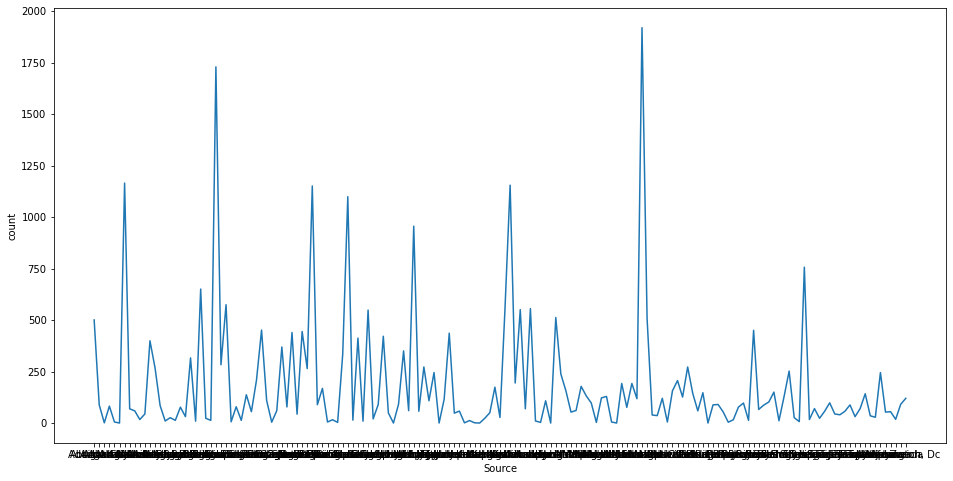

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=data, x="Source",y="count" )

In [ ]:
#data= data.sort_values(by="count",  ascending=False)

In [ ]:
data

,count
Source,
Abudhabi,501
Addis Ababa,89
Addu City,2
Agartala,83
Agatti Island,6
...,...
Vancouver,54
Vienna,56
Vijayawada,19


In [ ]:
destn=flight_data.groupby("Destination")["Uniq Id"].agg({"count"})
#destn=destn.sort_values(by="count",  ascending=False)
destn

,count
Destination,
Agartala,218
Ahmedabad,372
Ajmer,3
Allahabad,42
Amritsar,269
...,...
Udaipur,341
Vadodara,33
Varanasi,688


In [ ]:
destn=flight_data.groupby("Destination")["Uniq Id"].agg({"count"})

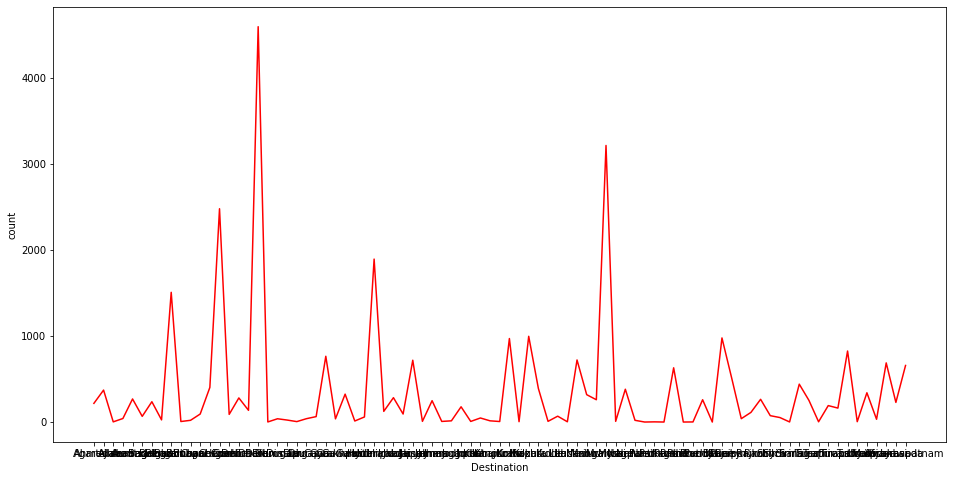

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=destn, x="Destination",y="count",color='red' )

In [ ]:
city_count=flight_data.groupby("Source")["Uniq Id"].count().to_dict()
city_count

{'Abudhabi': 501,
 'Addis Ababa': 89,
 'Addu City': 2,
 'Agartala': 83,
 'Agatti Island': 6,
 'Agra': 1,
 'Ahmedabad': 1165,
 'Aizawl': 70,
 'Al Ain': 60,
 'Allahabad': 18,
 'Almaty': 45,
 'Amritsar': 400,
 'Amsterdam': 269,
 'Antalya': 86,
 'Ashgabat': 11,
 'Astana': 27,
 'Aurangabad': 14,
 'Bagdogra': 78,
 'Baghdad': 32,
 'Bahrain': 317,
 'Baku': 10,
 'Bangkok': 651,
 'Basra': 24,
 'Belgaum': 14,
 'Bengaluru': 1729,
 'Bhopal': 284,
 'Bhubaneswar': 575,
 'Bhuj': 7,
 'Birmingham': 80,
 'Bishkek': 14,
 'Brusells': 138,
 'Cairo': 56,
 'Chandigarh': 209,
 'Chennai': 452,
 'Chicago': 111,
 'Chittagong': 5,
 'Cochin': 61,
 'Coimbatore': 370,
 'Cologne': 79,
 'Colombo': 440,
 'Copenhagen': 44,
 'Dammam': 445,
 'Dehra Dun': 265,
 'Delhi': 1151,
 'Denpasar': 90,
 'Dhaka': 169,
 'Dharamsala': 6,
 'Dibrugarh': 17,
 'Dimapur': 4,
 'Don Mueang': 335,
 'Dubai': 1099,
 'Dushanbe': 15,
 'Frankfurt': 413,
 'Gaya': 10,
 'Goa': 549,
 'Gorakhpur': 21,
 'Guangzhou': 91,
 'Guwahati': 422,
 'Helnski': 50,
 

In [ ]:
flight_data["Source Count"]= flight_data["Source"].map(city_count)

In [ ]:
per_1= flight_data.shape[0]*0.005
per_1

150.12

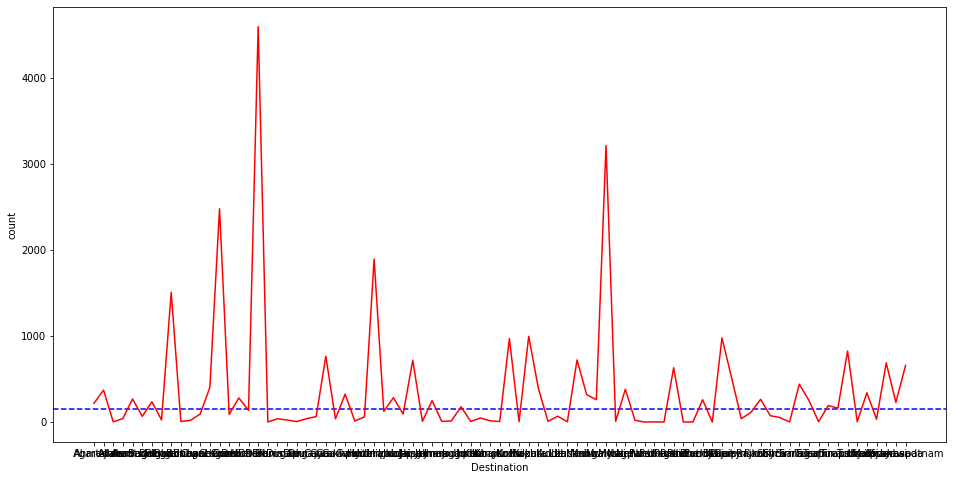

In [ ]:
plt.figure(figsize=(16,8))
plt.axhline(y=per_1,color='blue',linestyle='--')
sns.lineplot(data=destn, x="Destination",y="count",color='red' )

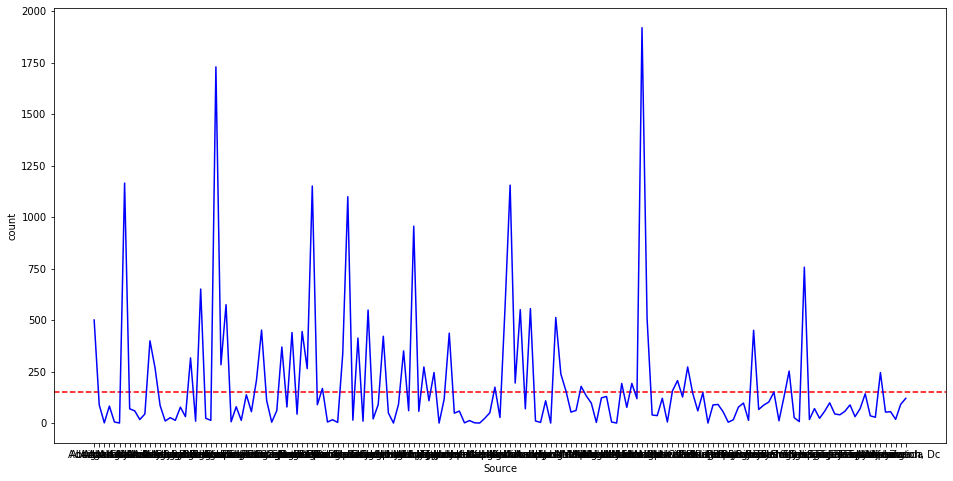

In [ ]:
plt.figure(figsize=(16,8))
plt.axhline(y=per_1,color='red',linestyle='--')
sns.lineplot(data=data, x="Source",y="count",color='blue' )

In [ ]:
common_source=flight_data.loc[flight_data["Source Count"]>per_1]["Source"].unique().tolist()
common_source

['Dubai',
 'Delhi',
 'Mumbai',
 'Jeddah',
 'Kochi',
 'Bhopal',
 'Don Mueang',
 'Riyadh',
 'Bengaluru',
 'Guwahati',
 'Amritsar',
 'Kualalumpur',
 'Vadodara',
 'Dehra Dun',
 'Hong Kong',
 'Kolkata',
 'Kozhikode',
 'Hyderabad',
 'Bhubaneswar',
 'Paris',
 'Chandigarh',
 'Ahmedabad',
 'Singapore',
 'Bangkok',
 'Abudhabi',
 'Coimbatore',
 'Dammam',
 'Dhaka',
 'Bahrain',
 'Jaipur',
 'Chennai',
 'London',
 'Frankfurt',
 'Colombo',
 'Newark',
 'Kuwait',
 'Goa',
 'Lucknow',
 'Amsterdam',
 'Moscow',
 'Indore',
 'Muscat',
 'Sharjah',
 'Male',
 'Kathmandu',
 'New York',
 'Medina',
 'Seoul',
 'Luxembourg']

In [ ]:
len(common_source)

49

In [ ]:
source_encoder={
    val:id+1 for id,val in enumerate(common_source)
}
source_encoder

{'Abudhabi': 25,
 'Ahmedabad': 22,
 'Amritsar': 11,
 'Amsterdam': 39,
 'Bahrain': 29,
 'Bangkok': 24,
 'Bengaluru': 9,
 'Bhopal': 6,
 'Bhubaneswar': 19,
 'Chandigarh': 21,
 'Chennai': 31,
 'Coimbatore': 26,
 'Colombo': 34,
 'Dammam': 27,
 'Dehra Dun': 14,
 'Delhi': 2,
 'Dhaka': 28,
 'Don Mueang': 7,
 'Dubai': 1,
 'Frankfurt': 33,
 'Goa': 37,
 'Guwahati': 10,
 'Hong Kong': 15,
 'Hyderabad': 18,
 'Indore': 41,
 'Jaipur': 30,
 'Jeddah': 4,
 'Kathmandu': 45,
 'Kochi': 5,
 'Kolkata': 16,
 'Kozhikode': 17,
 'Kualalumpur': 12,
 'Kuwait': 36,
 'London': 32,
 'Lucknow': 38,
 'Luxembourg': 49,
 'Male': 44,
 'Medina': 47,
 'Moscow': 40,
 'Mumbai': 3,
 'Muscat': 42,
 'New York': 46,
 'Newark': 35,
 'Paris': 20,
 'Riyadh': 8,
 'Seoul': 48,
 'Sharjah': 43,
 'Singapore': 23,
 'Vadodara': 13}

In [ ]:
null_for_source={
    "Source Encoded":0
}

In [ ]:
flight_data["Source Encoded"]= flight_data["Source"].map(source_encoder)

In [ ]:
flight_data.fillna(value=null_for_source, inplace=True)

In [ ]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0


In [ ]:
null_for_destn={
    "Destination Encoded":0
}

In [ ]:
flight_data["Destination Encoded"]= flight_data["Destination"].map(source_encoder)
flight_data.fillna(value=null_for_destn, inplace=True)

In [ ]:
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0


In [ ]:
flight_data["Source Encoded"].corr(flight_data.Fare)

0.012550471652281568

In [ ]:
flight_data["Destination Encoded"].corr(flight_data.Fare)

-0.04079053891944303

In [ ]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0


In [ ]:
flight_data["Fare"].corr(flight_data["Number Of Stops"])

0.1820248916928675

In [ ]:
flight_data["S-D"]=flight_data["Source Encoded"]-flight_data["Destination Encoded"].abs()

In [ ]:
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0,3.0


In [ ]:
flight_data["Fare"].corr(flight_data["S-D"])

0.038121543746311624

In [ ]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0


In [ ]:
flight_data["Departure Date"]=flight_data["Departure Date"].astype("str")
flight_data["DepDay"]=pd.to_datetime(flight_data["Departure Date"]).dt.day
flight_data["Arrival Date"]=flight_data["Arrival Date"].astype("str")
flight_data["ArrDay"]=pd.to_datetime(flight_data["Arrival Date"]).dt.day

In [ ]:
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0,3.0,23,24


In [ ]:

flight_data["DepMonth"]=pd.to_datetime(flight_data["Departure Date"]).dt.month

flight_data["ArrMonth"]=pd.to_datetime(flight_data["Arrival Date"]).dt.month

In [ ]:
flight_data.DepMonth.value_counts()

1    15670
2    14354
Name: DepMonth, dtype: int64

In [ ]:
flight_data['Dep_Week_of_month'] = pd.to_datetime(flight_data['Departure Date']).apply(lambda d: (d.day-1) // 7 + 1)

In [ ]:
flight_data['Arr_Week_of_month'] = pd.to_datetime(flight_data['Arrival Date']).apply(lambda d: (d.day-1) // 7 + 1)

In [ ]:
day_count=flight_data.groupby("DepDay")["Uniq Id"].agg({"count"})

In [ ]:
day_count

,count
DepDay,
1,1363
2,867
3,1527
4,815
6,2451
8,1552
9,874
10,1623
11,824


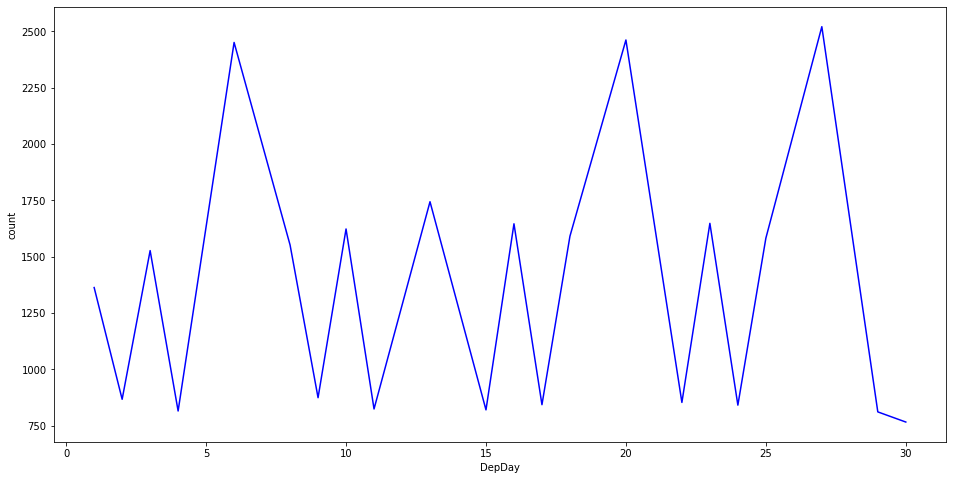

In [ ]:
plt.figure(figsize=(16,8))

sns.lineplot(data=day_count, x="DepDay",y="count",color='blue' )

In [ ]:
flight_data["Fare"].corr(flight_data["DepDay"])

-0.044080046032900416

In [ ]:
week_count=flight_data.groupby("Dep_Week_of_month")["Uniq Id"].agg({"count"})

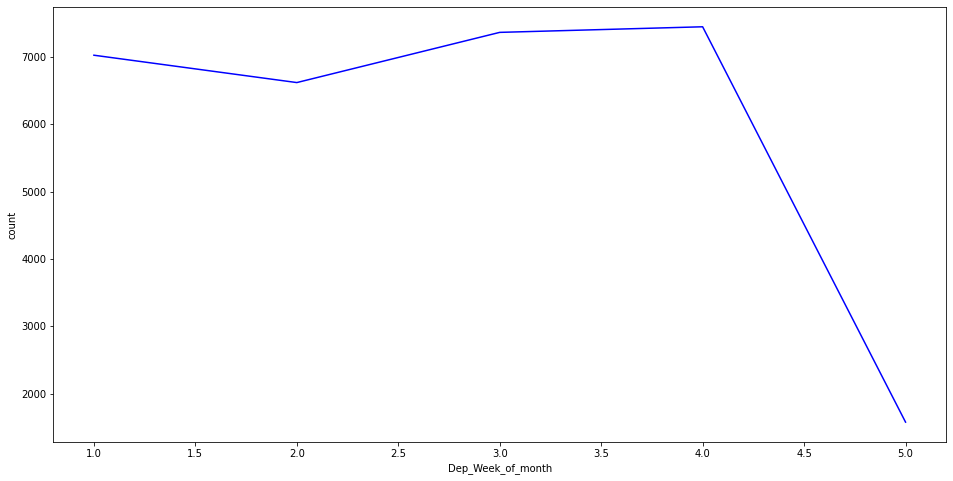

In [ ]:
plt.figure(figsize=(16,8))

sns.lineplot(data=week_count, x="Dep_Week_of_month",y="count",color='blue' )

In [ ]:
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0,3.0,23,24,1,1,4,4


In [ ]:
def timeCon(t):
  h=int (t.split(sep="h")[0])*60
  m=int (t.split(sep="m")[0].split(sep ="h")[1])

  return h+m;

# print(timeCon("02h02m"))

In [ ]:
flight_data["Total Time"]=flight_data["Total Time"].astype("str")
flight_data["Total Time Norm"]=flight_data["Total Time"].map(timeCon)
flight_data.head(3)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1,100
2,0868155ae620dd8e7cd462e601b5f559,2020-01-01 00:35:50 +0000,Mumbai,Raipur,Kolkata,NaN,Silchar,Air India|Air India|Air India,AI-651|AI-9728|AI-753,23Jan2020,09:40,24Jan2020,07:00,21h 20m,2,13518.0,1919,3.0,0.0,3.0,23,24,1,1,4,4,1280


In [ ]:
flight_data["Fare"].corr(flight_data["Total Time Norm"])

0.34838963018815255

In [ ]:
def timeSlot(t):
  h=int (t.split(sep=":")[0])
  if (h>=0 and h<6): 
    return 1
  elif (h>=6 and h<12): 
    return 2
  elif (h>=12 and h<18):
     return 3
  elif (h>=18):
     return 4
  else:
     return 0

#print(timeSlot("22:45"))

In [ ]:
flight_data["Departure Time"]=flight_data["Departure Time"].astype("str")
flight_data["DepSlot"]=flight_data["Departure Time"].map(timeSlot)

In [ ]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm,DepSlot
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135,4
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1,100,3


In [ ]:
def OperatorGetter(op):
  y=op.split(sep="|")[0]
  return y

#print(OperatorGetter("SpiceJet"))

In [ ]:
flight_data["Modified Flight Operator"]=flight_data["Flight Operator"].map(OperatorGetter)
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm,DepSlot,Modified Flight Operator
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135,4,Oman Air
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1,100,3,SpiceJet


In [ ]:
flight_data['Modified Flight Operator'].value_counts()

Air India                9584
Indigo                   4289
Vistara                  2349
Emirates Airlines        1451
SpiceJet                 1266
                         ... 
Hainan Airlines             1
Jat Airways                 1
Juneyao Airlines            1
Azerbaijan Airlines         1
Royal Brunei Airlines       1
Name: Modified Flight Operator, Length: 115, dtype: int64

In [ ]:
mod_flt=flight_data.groupby('Modified Flight Operator')["Uniq Id"].agg({"count"})
mod_flt

,count
Modified Flight Operator,
Aer Lingus,3
Aeroflot Russian Airlines,132
Air Astana,80
Air Canada,113
Air China,62
...,...
Uzbekistan Airways,6
Vietnam Airlines,32
Virgin Atlantic Airways,19


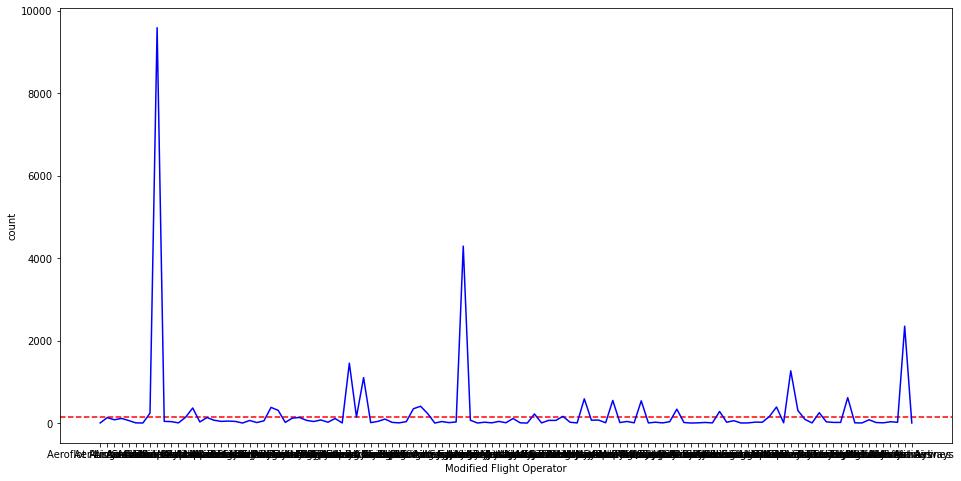

In [ ]:
plt.figure(figsize=(16,8))
plt.axhline(y=per_1,color='red',linestyle='--')
sns.lineplot(data=mod_flt, x="Modified Flight Operator",y="count",color='blue' )

<Figure size 3600x3600 with 0 Axes>

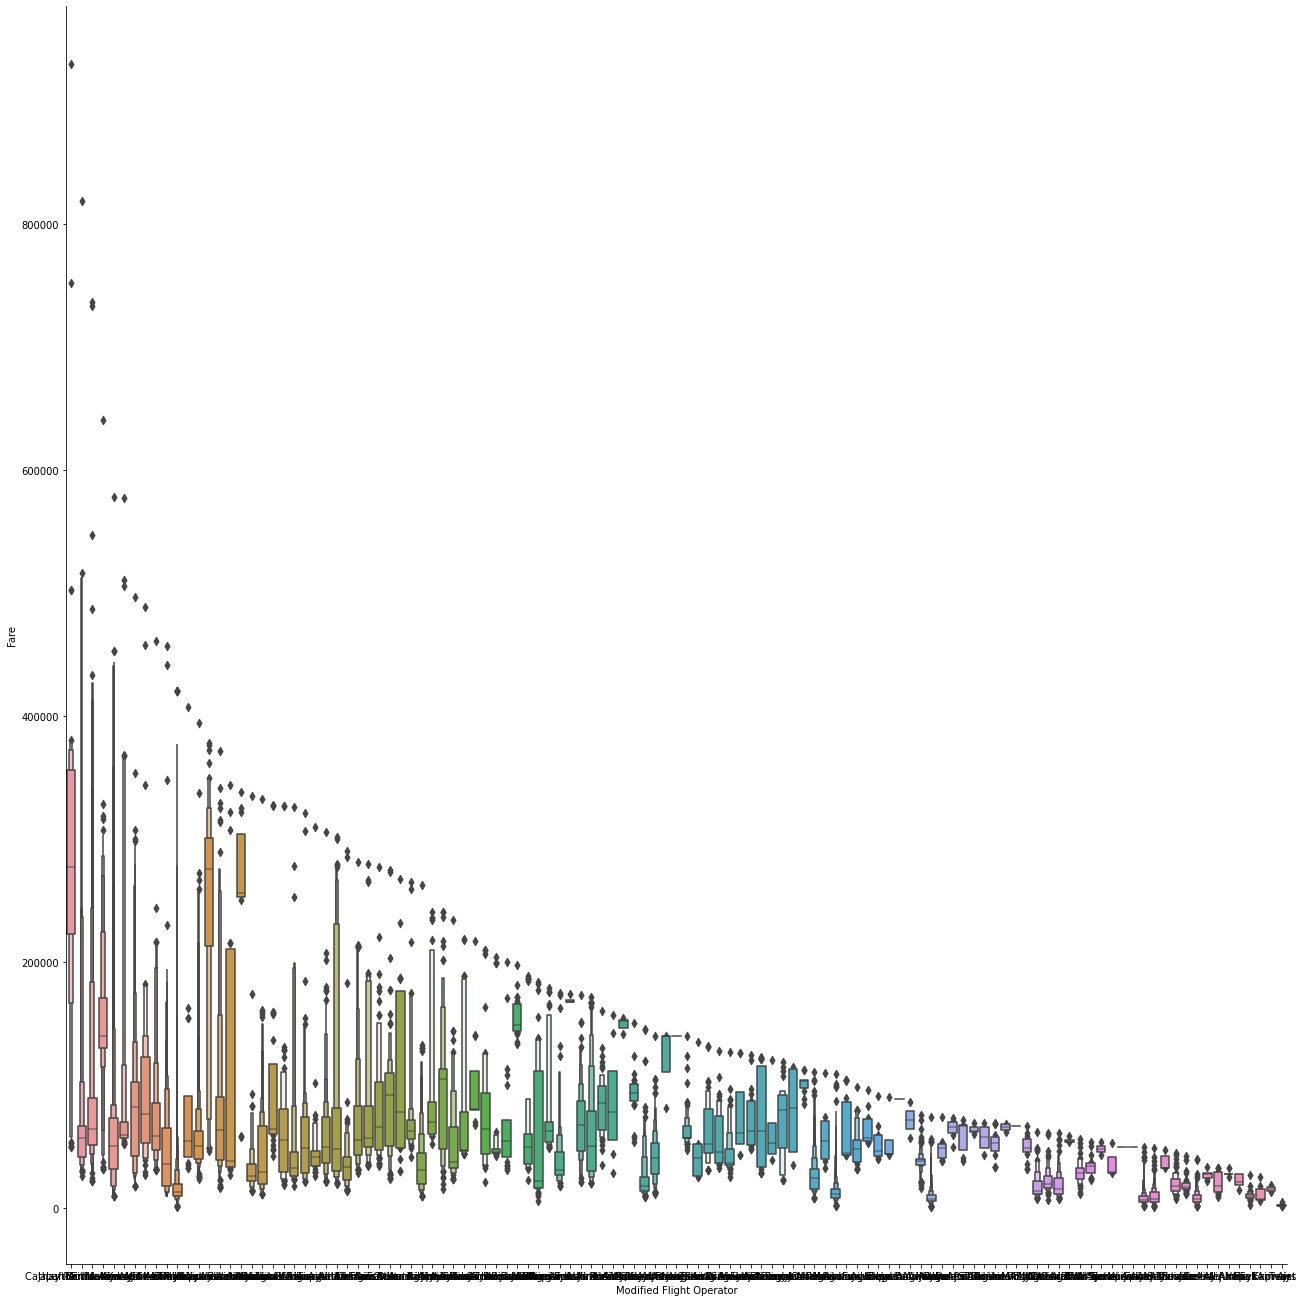

In [ ]:
plt.figure(figsize=(50,50))
sns.catplot(y = "Fare", x = "Modified Flight Operator", data = flight_data.sort_values("Fare", ascending = False), kind="boxen", height = 18, aspect = 1)
plt.show()

In [ ]:
flight_data.head(1)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm,DepSlot,Modified Flight Operator
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135,4,Oman Air


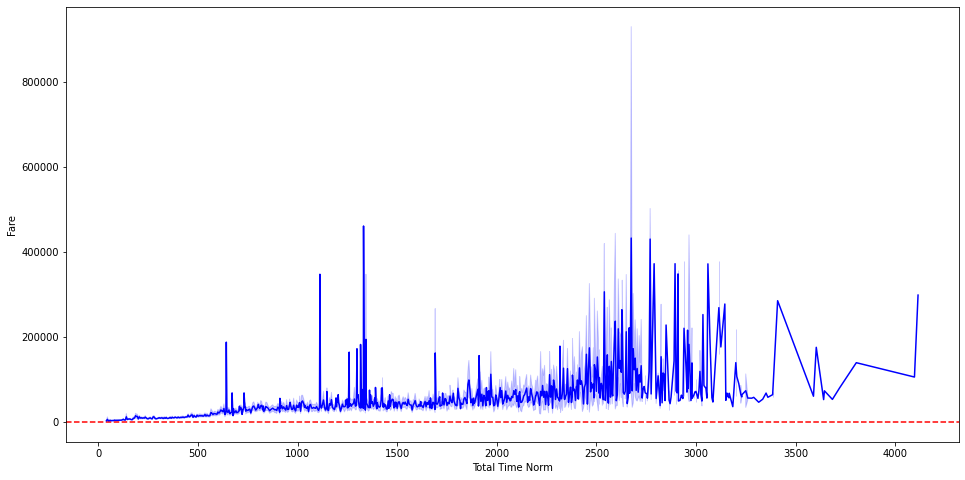

In [ ]:
plt.figure(figsize=(16,8))
plt.axhline(y=per_1,color='red',linestyle='--')
sns.lineplot(data=flight_data, x="Total Time Norm",y="Fare",color='blue' )

In [ ]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm,DepSlot,Modified Flight Operator
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135,4,Oman Air
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1,100,3,SpiceJet


In [ ]:
from sklearn import preprocessing


In [ ]:
airlines = flight_data["Modified Flight Operator"].unique().tolist()
len(airlines)

115

In [ ]:
airlines_encoder={
    val:id+1 for id,val in enumerate(airlines)
}
airlines_encoder

{'Aer Lingus': 89,
 'Aeroflot Russian Airlines': 57,
 'Air Astana': 46,
 'Air Canada': 55,
 'Air China': 50,
 'Air Connect': 86,
 'Air Europa': 111,
 'Air France': 23,
 'Air India': 3,
 'Air India Express': 43,
 'Air Mauritius': 39,
 'Air Seychelles': 92,
 'AirArabia': 51,
 'AirAsia': 26,
 'Alaska Airlines': 64,
 'Alitalia': 35,
 'All Nippon Airways': 37,
 'American Airlines': 38,
 'Asiana Airlines': 62,
 'Austrian Airways': 18,
 'Azerbaijan Airlines': 99,
 'Bangkok Airways': 10,
 'Belavia Belarusian': 81,
 'Biman Bangladesh': 21,
 'British Airways': 15,
 'Cathay Pacific Airways': 33,
 'China Airlines': 88,
 'China Eastern Airlines': 44,
 'China Southern Airlines': 25,
 'Delta Airlines': 58,
 'Deutsche Bahn Ag': 42,
 'Dragonair': 36,
 'EVA Airways': 82,
 'Egypt Airways': 14,
 'El-Al-Israel Airlines': 59,
 'Emirates Airlines': 13,
 'Ethiopian Airlines': 8,
 'Etihad Airways': 12,
 'Eurowings': 53,
 'Finnair': 70,
 'FlyDubai': 48,
 'Flybe': 71,
 'GF': 95,
 'Garuda Indonesia': 84,
 'GoAir'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
flight_data = flight_data.drop(columns=['Crawl Timestamp','Layover1','Layover2','Layover3'])
# Uniq ID hatna hai yaha se bhi

In [ ]:
flight_data["Airlines Encoded"]=flight_data["Modified Flight Operator"].map(airlines_encoder)

In [ ]:
flight_data.head(2)

,Uniq Id,Crawl Timestamp,Source,Layover1,Layover2,Layover3,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm,DepSlot,Modified Flight Operator,Airlines Encoded
0,723b6dbcffbdfc2c29321c248cb14a9d,2020-02-01 00:46:15 +0000,Dubai,Muscat,Delhi,NaN,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135,4,Oman Air,1
1,75624e36d7e8ea7e40cc5c33e6c96c01,2020-01-13 13:29:00 +0000,Delhi,NaN,NaN,NaN,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1,100,3,SpiceJet,2


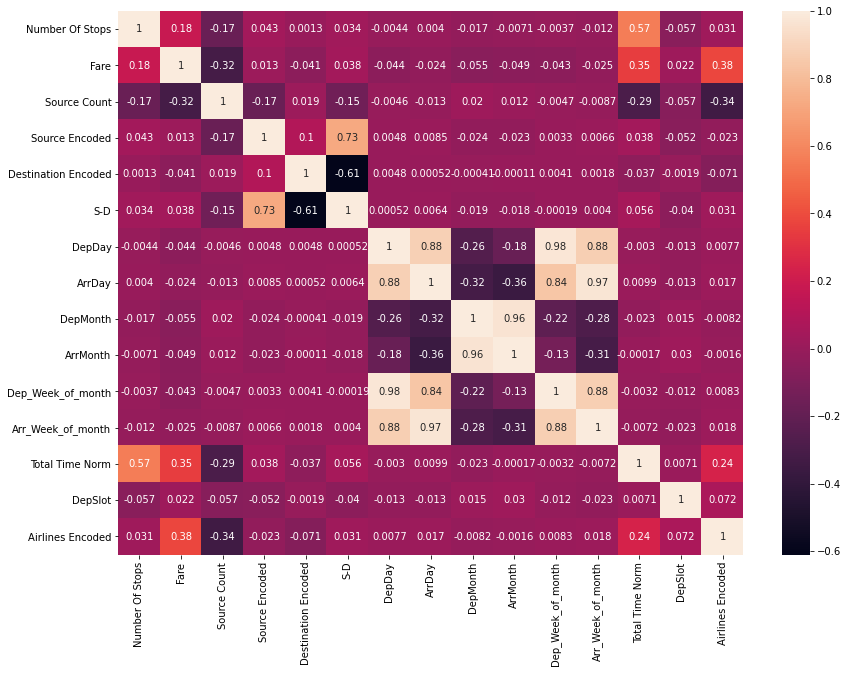

In [ ]:
import seaborn as sns
corr=flight_data.corr()
plt.figure(figsize=(14,10))
ax = sns.heatmap(corr,annot=True)

In [ ]:
flight_data.head(2)

,Source,Destination,Flight Operator,Flight Number,Departure Date,Departure Time,Arrival Date,Arrival Time,Total Time,Number Of Stops,Fare,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm,DepSlot,Modified Flight Operator,Airlines Encoded
0,Dubai,Kolkata,Oman Air|Oman Air|Air India,WY-612|WY-241|AI-764,06Feb2020,22:45,07Feb2020,19:10,18h 55m,2,26224.0,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135,4,Oman Air,1
1,Delhi,Patna,SpiceJet,SG-8480,01Feb2020,15:45,01Feb2020,17:25,01h 40m,0,2889.0,1151,2.0,0.0,2.0,1,1,2,2,1,1,100,3,SpiceJet,2


In [ ]:
features = ['Number Of Stops','Source Count','Source Encoded','Destination Encoded','S-D','DepDay','ArrDay','DepMonth',
            'ArrMonth','Dep_Week_of_month','Arr_Week_of_month','Total Time Norm'
            ,'DepSlot','Airlines Encoded','Fare']

new_data = flight_data[features]
new_data.head(3)

,Number Of Stops,Source Count,Source Encoded,Destination Encoded,S-D,DepDay,ArrDay,DepMonth,ArrMonth,Dep_Week_of_month,Arr_Week_of_month,Total Time Norm,DepSlot,Airlines Encoded,Fare
0,2,1099,1.0,16.0,-15.0,6,7,2,2,1,1,1135,4,1,26224.0
1,0,1151,2.0,0.0,2.0,1,1,2,2,1,1,100,3,2,2889.0
2,2,1919,3.0,0.0,3.0,23,24,1,1,4,4,1280,2,3,13518.0


In [ ]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=8,
              forward=True,
              scoring = 'r2',
              cv = 5)
    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [ ]:
x_train = new_data.drop(columns=['Fare'])
y_train = new_data['Fare']

In [ ]:
FFS(x_train , y_train)

('Source Count',
 'Source Encoded',
 'DepDay',
 'DepMonth',
 'ArrMonth',
 'Arr_Week_of_month',
 'Total Time Norm',
 'Airlines Encoded')

In [ ]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

,Features,Importances
13,Airlines Encoded,0.442905
11,Total Time Norm,0.163927
1,Source Count,0.130806
4,S-D,0.041904
3,Destination Encoded,0.035390
12,DepSlot,0.032799
0,Number Of Stops,0.032447
5,DepDay,0.031214
6,ArrDay,0.030638
2,Source Encoded,0.027734


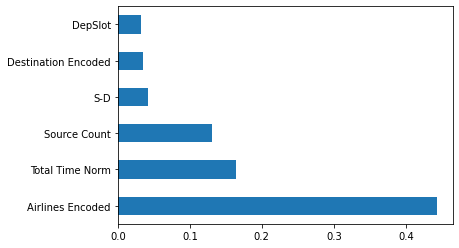

In [ ]:
feature_importance=tree_based_feature_importance(x_train,y_train) # dataframe for the same
display(feature_importance)

In [ ]:
selected_features = ["Airlines Encoded"	
	,"Total Time Norm"	
	,"Source Count"	
	,"S-D"	
	,"Destination Encoded"	
	,"DepSlot","Number Of Stops"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = new_data[selected_features]
y = new_data[['Fare']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(22518, 7) (7506, 7) (22518, 1) (7506, 1)


In [ ]:
from sklearn.linear_model import LinearRegression # Importing the linear regression class form sklearn.
from sklearn.metrics import mean_squared_error # Mean squared error, will give us the error from the actual values.
from sklearn.metrics import r2_score # r2 score will give us the scoreo of the predictions.

linear_regressor_1 = LinearRegression() # regressor-1
linear_regressor_1.fit(X_train, y_train) # regressor 1 will fit the FFS features

predicted_1 = linear_regressor_1.predict(X_test) 

mse_1 = mean_squared_error(y_test, predicted_1)
r2_1 = r2_score(y_test, predicted_1)
# MSE and R2 score for the ffs features

print(f'FFS Features : {mse_1} , {r2_1}')

FFS Features : 1810659634.7635887 , 0.21371150223636826


In [ ]:
from sklearn.ensemble import RandomForestRegressor # Importing the Random forest regressor algo from sklearn ensemble.

# Random forest Regressor is an ensemble method which parallely trains many decsion tree and the 
# Average of these tree is the prediction . 
# N estimators are the number of parallel trees that needs to be trained. 

random_forest_regressor_1 = RandomForestRegressor(n_estimators=130,max_features='auto',min_samples_split=8,bootstrap=True)

random_forest_regressor_1.fit(X_train, y_train) # r-1 for the ffs features r-2 for the tree features

predicted_1 = random_forest_regressor_1.predict(X_test) # prediction on ffs features

mse_1 = mean_squared_error(y_test, predicted_1)
r2_1 = r2_score(y_test, predicted_1)

print(f'{mse_1} , {r2_1}')

878652573.150964 , 0.6184404851499183


In [ ]:
import xgboost as xgb # XGB boosting library

xgb_regressor_1 = xgb.XGBRegressor()
xgb_regressor_1.fit(X_train, y_train)  

predicted_1 = xgb_regressor_1.predict(X_test)

mse_1 = mean_squared_error(y_test, predicted_1)
r2_1 = r2_score(y_test, predicted_1)

print(f'Tree Features : {mse_1} , {r2_1}')

[18:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tree Features : 1186296777.6425877 , 0.48484436650280993


In [ ]:
from sklearn.svm import SVR # Importing the support vector regressor

svm_regressor_1 = SVR()
svm_regressor_1.fit(X_train, y_train) # regressor 1 will fit the FFS features


predicted_1 = svm_regressor_1.predict(X_test)

mse_1 = mean_squared_error(y_test, predicted_1)
r2_1 = r2_score(y_test, predicted_1)

print(f'Tree Features : {mse_1} , {r2_1}')

Tree Features : 2544873532.29438 , -0.10512475580063363


In [ ]:
def hyperParameterTuning(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    param_tuning = {
        'learning_rate': [0.01, 0.1], # Learning rate for the Gradient descent algorithm
        'max_depth': [3, 5, 7, 10], # maximum depth of a tree (prevents overfitting)
        'min_child_weight': [1, 3, 5], # sum of weights of all observations required in a child
        'subsample': [0.5, 0.7], #  fraction of observations to be randomly sampled for each tree.
        'n_estimators' : [100, 200, 500], # No of trees
    }
    xgb_model = xgb.XGBRegressor() # Declaring the regressor
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5, # cross validation = 5, (4 train rest 1-test)
                           n_jobs = -1, ## all processors
                           verbose = 1)

    gsearch.fit(X_train,y_train) # fittinng the data
    return gsearch.best_score_ , gsearch.best_params_

In [ ]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.7min


KeyboardInterrupt: ignored